In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#Generated Pions
m = np.random.normal(139.07138, 0.00035, 10000)
m

array([139.07164033, 139.07161053, 139.07157608, ..., 139.07072916,
       139.07061536, 139.07137268])

In [6]:
#Generated Momentum 
a = np.random.exponential(10.0, 10000)
a

array([1.02666599, 7.87882567, 2.82049315, ..., 6.36069663, 4.9043795 ,
       8.0880006 ])

In [7]:
#Decay Angle
b = np.random.uniform(-1, 1, 10000)
b

array([-0.23614262,  0.02418728,  0.13623303, ..., -0.39701353,
        0.8593639 ,  0.06437046])

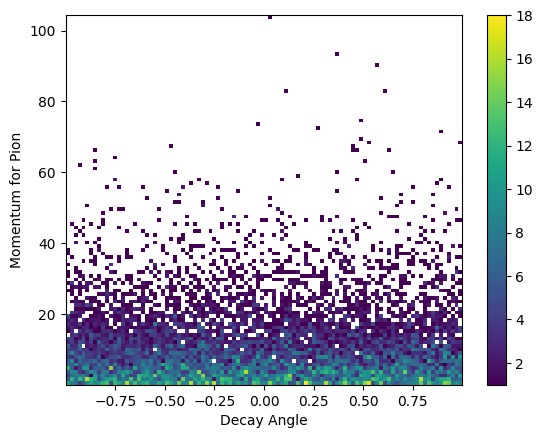

In [77]:
### P vs. angle
plt.hist2d(b, a, bins=100, cmin=1)
plt.xlabel('Decay Angle')
plt.ylabel('Momentum for Pion')
plt.colorbar()
plt.savefig('./PvsThetaforPions.png')

Text(0.5, 0, 'Mass in CM frame')

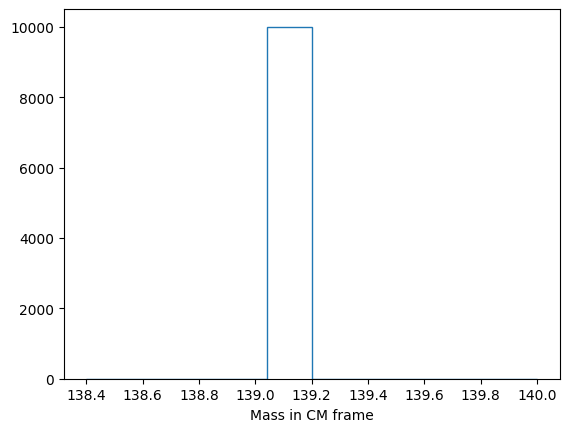

In [76]:
### 1D m
plt.hist(m, range=(138.4, 140), histtype='step')
#plt.xlim(0, 0.5)
plt.xlabel('Mass in CM frame')

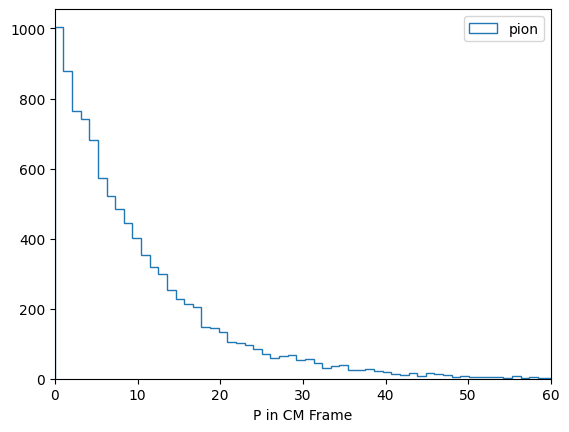

In [81]:
### 1D p
plt.hist(a, bins=100, histtype='step', label='pion')
plt.xlabel('P in CM Frame')
plt.xlim(0,60)
plt.legend()


Text(0.5, 0, 'Theta in CM Frame')

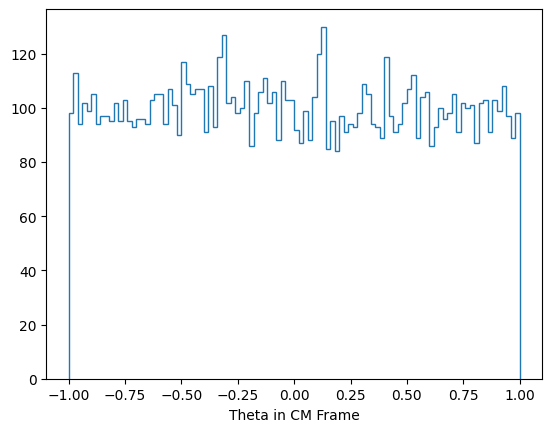

In [74]:
### 1D theta
plt.hist(b, bins=100, histtype='step')
plt.xlabel('Theta in CM Frame')

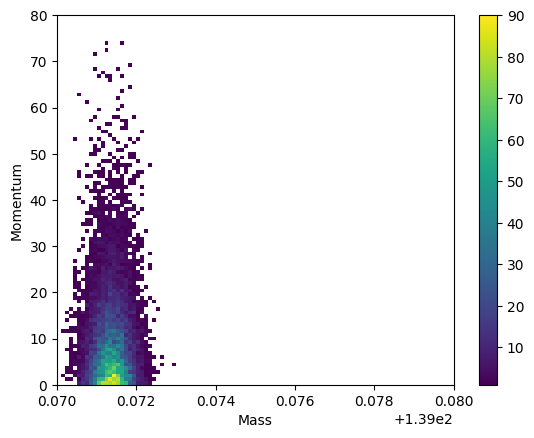

In [78]:
#P vs M
plt.hist2d(m,a, bins=100, cmin=1, range=[[139.07,139.08],[0,80]])
plt.xlabel('Mass')
plt.ylabel('Momentum')
plt.colorbar()

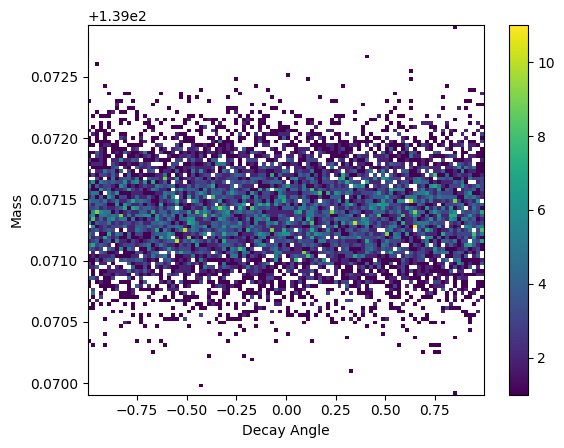

In [79]:
#M vs Decay Angle
plt.hist2d(b,m, bins=100, cmin=1)
plt.xlabel('Decay Angle')
plt.ylabel('Mass')
plt.colorbar()

In [14]:
#Generated Muons
mb=np.random.normal(105.6583755,0.0000023,10000)
mb

array([105.65837623, 105.65837885, 105.65837797, ..., 105.65837825,
       105.65837698, 105.65837723])

In [15]:
def CM_momentum(ma,mb):
    p = [(ma*ma) - (mb*mb)]/(2*(ma))
    return p

def Energy_of_B(mB,pB):
    EB=np.sqrt((mB*mB)+(pB*pB))
    return EB

def lab_mom_parallel(pB,angle,EB):
    P_parallel=(pB)*(np.cos(angle))+EB*beta*gamma
    return P_parallel

def lab_mom_perpendi(pB,angle):
    P_perpendi=pB* np.sin(angle)
    return P_perpendi

def energy_lab(EB,pB,angle):
    EB_lab=gamma*EB+[np.cos(angle)*pB*beta*gamma]
    return EB_lab

def Plab_mag(p1,p2):
    P_mag=np.sqrt((p1*p1)+(p2*p2))
    return P_mag

def decay_angle_lab(P3,P4):
    Angle_lab=np.arccos(P3/P4)
    return Angle_lab

In [16]:
cm_p = CM_momentum(m,mb)

In [18]:
eb = Energy_of_B(mb,cm_p)

In [66]:
beta = 0.9
gamma = 1./np.sqrt(1-beta**2)

In [68]:
parallel = lab_mom_parallel(cm_p, b, eb)

In [69]:
perpendi = lab_mom_perpendi(cm_p, b)

In [70]:
energy_lab(eb, cm_p, b)

array([[[310.62292935, 312.28973554, 311.74499159, ..., 307.58433143,
         291.2374668 , 312.18127101]]])

In [71]:
mag = Plab_mag(parallel, perpendi)

In [72]:
lab_angle = decay_angle_lab(parallel, mag)

In [73]:
np.rad2deg(lab_angle)

array([[1.54488784, 0.15923637, 0.89505419, ..., 2.56696449, 5.17971511,
        0.42360785]])